In [1210]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [1211]:
data = pd.read_csv("hyd_v2.csv")


In [1212]:
data.shape

(19110, 36)

In [1213]:
data.head()
# id, locality_id, ownerName, propertyType, shortUrl, weigth, propertyType, completeStreetName, facingDesc, parkingDesc can be droped
# because they are not needed or are already elaborated in other coumns


,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,None,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [1214]:
data = data.drop(columns=['id', 'localityId', 'ownerName', 'propertyType', 'shortUrl',
                 'weight', 'propertyType', 'completeStreetName', 'facingDesc', 'parkingDesc','combineDescription'], axis=1)


In [1215]:
data.shape


(19110, 26)

In [1216]:
data.columns


Index(['active', 'amenities', 'balconies', 'bathroom', 'deposit', 'facing',
       'floor', 'furnishingDesc', 'gym', 'isMaintenance', 'lift',
       'loanAvailable', 'locality', 'location', 'maintenanceAmount', 'parking',
       'propertyTitle', 'property_age', 'property_size', 'reactivationSource',
       'rent_amount', 'sharedAccomodation', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply'],
      dtype='object')

In [1217]:
# def amenities(dictionary):
#     dictionary = f'{dictionary}'
#     # print(type(dictionary))
#     dictionary = json.loads(dictionary)
#     print(type(dictionary))
#     # available = 0
#     # for i in dictionary.values():
#     #     if i == true:
#     #         available += 1
#     # print(available/19)
#     print(dictionary)


# # a = amenities('{"LIFT": true, "GYM": false, "INTERNET": false, "AC": false, "CLUB": false, "INTERCOM": false, "POOL": false, "CPA": true, "FS": false,"SERVANT": false, "SECURITY": true, "SC": false, "GP": false, "PARK": false, "RWH": true, "STP": false, "HK": false, "PB": true, "VP": true}')
# # print(a)
# data['amenities'].apply(amenities)


In [1218]:
data.isnull().sum()

active                 0
amenities              0
balconies              0
bathroom               0
deposit                0
facing                 0
floor                  0
furnishingDesc         0
gym                    0
isMaintenance          0
lift                   0
loanAvailable          0
locality               6
location               0
maintenanceAmount      0
parking                0
propertyTitle          0
property_age           0
property_size          0
reactivationSource    63
rent_amount            0
sharedAccomodation     0
swimmingPool           0
totalFloor             0
type_bhk               0
waterSupply            0
dtype: int64

In [1219]:
data.shape

(19110, 26)

In [1220]:
data = data.dropna(axis=0,how='any')

In [1221]:
data.isnull().sum()
# data is dropped because the null values are very low and removing them doesnt make a difference

active                0
amenities             0
balconies             0
bathroom              0
deposit               0
facing                0
floor                 0
furnishingDesc        0
gym                   0
isMaintenance         0
lift                  0
loanAvailable         0
locality              0
location              0
maintenanceAmount     0
parking               0
propertyTitle         0
property_age          0
property_size         0
reactivationSource    0
rent_amount           0
sharedAccomodation    0
swimmingPool          0
totalFloor            0
type_bhk              0
waterSupply           0
dtype: int64

In [1222]:
data.drop(columns=['amenities','propertyTitle'],axis=1,inplace=True)

In [1223]:
data.iloc[0]

active                                                       True
balconies                                                       3
bathroom                                                        3
deposit                                                     90000
facing                                                          W
floor                                                           3
furnishingDesc                                               Semi
gym                                                         False
isMaintenance                                                True
lift                                                         True
loanAvailable                                                True
locality                                               Gachibowli
location              17.465080245131944000,78.340134322090170000
maintenanceAmount                                            2000
parking                                                      BOTH
property_a

In [1224]:
data['locality'].value_counts()

Kukatpally        1519
Kondapur          1232
Gachibowli         713
Miyapur            601
Hafeezpet          466
                  ... 
Namalagundu          1
Medipattanam         1
Himayathnagar        1
Shilpa Park          1
Sikh Village,        1
Name: locality, Length: 2634, dtype: int64

In [1225]:
# lets ignore values less than 10 to lessen the data which makes encoding easy
locations = data['locality'].value_counts()
less_than_10 = locations[locations <= 10]
data['locality'] = data['locality'].apply(lambda x: 'other' if x in less_than_10 else x)


In [1226]:
data['locality'].value_counts()

other                 4165
Kukatpally            1519
Kondapur              1232
Gachibowli             713
Miyapur                601
                      ... 
Shilpa Hills            11
Nampally                11
Gopanapalli Thanda      11
Peeramcheru             11
L. B. Nagar             11
Name: locality, Length: 211, dtype: int64

In [1227]:
data.head()

,active,balconies,bathroom,deposit,facing,floor,furnishingDesc,gym,isMaintenance,lift,...,parking,property_age,property_size,reactivationSource,rent_amount,sharedAccomodation,swimmingPool,totalFloor,type_bhk,waterSupply
0,True,3,3,90000,W,3,Semi,False,True,True,...,BOTH,5,2200,USER_DASHBOARD,28000,False,False,5,BHK3,CORP_BORE
1,True,1,2,45000,E,2,Unfurnished,False,False,False,...,TWO_WHEELER,1,1200,USER_DASHBOARD,15000,False,False,2,BHK3,BOREWELL
2,True,3,3,80000,E,0,Semi,True,True,True,...,BOTH,0,1800,MISSED_CALL,16000,False,False,3,BHK3,CORP_BORE
3,True,1,2,18000,W,2,Unfurnished,False,True,False,...,BOTH,0,750,MISSED_CALL,9000,False,False,2,BHK2,CORP_BORE
4,True,2,2,80000,E,2,Semi,False,True,True,...,BOTH,5,1250,None,32500,False,False,5,BHK2,CORP_BORE


In [1228]:
data.iloc[0]

active                                                       True
balconies                                                       3
bathroom                                                        3
deposit                                                     90000
facing                                                          W
floor                                                           3
furnishingDesc                                               Semi
gym                                                         False
isMaintenance                                                True
lift                                                         True
loanAvailable                                                True
locality                                               Gachibowli
location              17.465080245131944000,78.340134322090170000
maintenanceAmount                                            2000
parking                                                      BOTH
property_a

In [1229]:
data['type_bhk'] = data['type_bhk'].apply(lambda x : x[3] if len(x)==4 else None)

In [1230]:
data['type_bhk'].value_counts()

2    9212
3    4210
1    4205
4     210
Name: type_bhk, dtype: int64

In [1231]:
data.isnull().sum()

active                   0
balconies                0
bathroom                 0
deposit                  0
facing                   0
floor                    0
furnishingDesc           0
gym                      0
isMaintenance            0
lift                     0
loanAvailable            0
locality                 0
location                 0
maintenanceAmount        0
parking                  0
property_age             0
property_size            0
reactivationSource       0
rent_amount              0
sharedAccomodation       0
swimmingPool             0
totalFloor               0
type_bhk              1204
waterSupply              0
dtype: int64

In [1232]:
data = data.dropna(axis=0,how='any')
# removing the data without BHK values coz they are few 

In [1233]:
data.isnull().sum()

active                0
balconies             0
bathroom              0
deposit               0
facing                0
floor                 0
furnishingDesc        0
gym                   0
isMaintenance         0
lift                  0
loanAvailable         0
locality              0
location              0
maintenanceAmount     0
parking               0
property_age          0
property_size         0
reactivationSource    0
rent_amount           0
sharedAccomodation    0
swimmingPool          0
totalFloor            0
type_bhk              0
waterSupply           0
dtype: int64

In [1234]:
data.iloc[0]

active                                                       True
balconies                                                       3
bathroom                                                        3
deposit                                                     90000
facing                                                          W
floor                                                           3
furnishingDesc                                               Semi
gym                                                         False
isMaintenance                                                True
lift                                                         True
loanAvailable                                                True
locality                                               Gachibowli
location              17.465080245131944000,78.340134322090170000
maintenanceAmount                                            2000
parking                                                      BOTH
property_a

In [1235]:
labelencoder = LabelEncoder()

In [1236]:
data['locality'].value_counts()

other              3889
Kukatpally         1434
Kondapur           1179
Gachibowli          668
Miyapur             576
                   ... 
 Madhapur             9
Madhura Nagar         9
 Gachibowli           9
L. B. Nagar           8
Jagadgiri Gutta       7
Name: locality, Length: 211, dtype: int64

In [1237]:
label = labelencoder.fit_transform(data.locality)
data.locality = label
label = labelencoder.fit_transform(data.active)
data.active = label
label = labelencoder.fit_transform(data.facing)
data.facing = label
label = labelencoder.fit_transform(data.furnishingDesc)
data.furnishingDesc = label
label = labelencoder.fit_transform(data.gym)
data.gym = label
label = labelencoder.fit_transform(data.isMaintenance)
data.isMaintenance = label
label = labelencoder.fit_transform(data.lift)
data.lift = label
label = labelencoder.fit_transform(data.loanAvailable)
data.loanAvailable = label
label = labelencoder.fit_transform(data.parking)
data.parking = label
label = labelencoder.fit_transform(data.reactivationSource)
data.reactivationSource = label
label = labelencoder.fit_transform(data.sharedAccomodation)
data.sharedAccomodation = label
label = labelencoder.fit_transform(data.swimmingPool)
data.swimmingPool = label
label = labelencoder.fit_transform(data.waterSupply)
data.waterSupply = label

In [1238]:
data['locality'].value_counts()

210    3889
100    1434
94     1179
51      668
126     576
       ... 
4         9
111       9
1         9
104       8
74        7
Name: locality, Length: 211, dtype: int64

In [1239]:
data.iloc[0]

active                                                          0
balconies                                                       3
bathroom                                                        3
deposit                                                     90000
facing                                                          9
floor                                                           3
furnishingDesc                                                  1
gym                                                             0
isMaintenance                                                   1
lift                                                            1
loanAvailable                                                   0
locality                                                       51
location              17.465080245131944000,78.340134322090170000
maintenanceAmount                                            2000
parking                                                         0
property_a

In [1240]:
data[['location-x', 'location-y']
     ] = data['location'].str.split(',', n=2, expand=True)


In [1241]:
data.loc[0]

active                                                          0
balconies                                                       3
bathroom                                                        3
deposit                                                     90000
facing                                                          9
floor                                                           3
furnishingDesc                                                  1
gym                                                             0
isMaintenance                                                   1
lift                                                            1
loanAvailable                                                   0
locality                                                       51
location              17.465080245131944000,78.340134322090170000
maintenanceAmount                                            2000
parking                                                         0
property_a

In [1242]:
del data['location']

In [1243]:
for i in data.iloc[0]:
    print(type(i))
    # print(i)

<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'str'>
<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int32'>
<class 'str'>
<class 'str'>


In [1244]:
data['balconies'] = data['balconies'].apply(lambda x: x if type(x)==int else 0)
data['maintenanceAmount'] = data['maintenanceAmount'].apply(lambda x: x if type(x)==int else 0)

In [1245]:
data['balconies'] = data['balconies'].astype(float)
data['location-x'] = data['location-x'].astype(float)
data['location-y'] = data['location-y'].astype(float)
data['type_bhk'] = data['type_bhk'].astype(float)
data['maintenanceAmount'] = data['maintenanceAmount'].astype(float)

OUTLINERS 

In [1246]:
data.describe()

,active,balconies,bathroom,deposit,facing,floor,furnishingDesc,gym,isMaintenance,lift,...,property_size,reactivationSource,rent_amount,sharedAccomodation,swimmingPool,totalFloor,type_bhk,waterSupply,location-x,location-y
count,17837.0,17837.0,17837.000000,1.783700e+04,17837.000000,17837.000000,17837.000000,17837.000000,17837.000000,17837.000000,...,17837.000000,17837.000000,17837.000000,17837.0,17837.000000,17837.000000,17837.000000,17837.000000,17837.000000,17837.000000
mean,0.0,0.0,1.955542,3.433480e+04,4.067893,2.158042,1.365084,0.080675,0.517015,0.337501,...,1110.040197,3.699950,15361.952010,0.0,0.086393,4.010147,2.023827,2.247856,17.450293,78.414848
std,0.0,0.0,0.710261,3.982529e+04,2.437498,2.465249,0.629531,0.272343,0.499724,0.472871,...,492.742711,1.008934,9248.670235,0.0,0.280952,3.973838,0.719949,0.883276,0.055711,0.082221
min,0.0,0.0,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,16.996283,78.184943
25%,0.0,0.0,1.000000,1.700000e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,800.000000,3.000000,9000.000000,0.0,0.000000,2.000000,2.000000,2.000000,17.409257,78.358297
50%,0.0,0.0,2.000000,2.600000e+04,5.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,1050.000000,3.000000,13000.000000,0.0,0.000000,3.000000,2.000000,2.000000,17.460885,78.391550
75%,0.0,0.0,2.000000,4.000000e+04,5.000000,3.000000,2.000000,0.000000,1.000000,1.000000,...,1350.000000,5.000000,18000.000000,0.0,0.000000,5.000000,2.000000,3.000000,17.493411,78.462138
max,0.0,0.0,7.000000,2.000000e+06,9.000000,31.000000,2.000000,1.000000,1.000000,1.000000,...,10000.000000,6.000000,100000.000000,0.0,1.000000,80.000000,4.000000,3.000000,17.656982,78.945549


In [1247]:
(data['property_size']/data['type_bhk']).describe()
# There are outliners
# lets take 250 as the minimum 

count    17837.000000
mean       551.955579
std        148.355919
min          0.000000
25%        475.000000
50%        525.000000
75%        600.000000
max       5000.000000
dtype: float64

In [1248]:
data = data[((data['property_size']/data['type_bhk'])>=250)]

In [1249]:
(data['property_size']/data['type_bhk']).describe()

count    17777.000000
mean       553.285181
std        146.753364
min        250.000000
25%        480.000000
50%        525.000000
75%        600.000000
max       5000.000000
dtype: float64

In [1250]:
data = data[(data['property_size'])<5000]

In [1251]:
data['bathroom'].describe()

count    17773.000000
mean         1.956901
std          0.709291
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: bathroom, dtype: float64

In [1252]:
data['rent_amount'].describe()

count     17773.000000
mean      15376.353851
std        9249.310609
min           0.000000
25%        9000.000000
50%       13000.000000
75%       18000.000000
max      100000.000000
Name: rent_amount, dtype: float64

In [1253]:
(data['rent_amount']/data['type_bhk']).describe()
# rent cant be less than a amount so they are outliners 
# lets take the minimum as 2000 and maximum as 10000

count    17773.000000
mean      7585.403608
std       2997.941137
min          0.000000
25%       5500.000000
50%       7000.000000
75%       9000.000000
max      60000.000000
dtype: float64

In [1254]:
data.shape

(17773, 25)

In [1255]:
data = data[((data['rent_amount']/data['type_bhk'])>=2500)]

In [1256]:
data.shape

(17738, 25)

In [1257]:
data = data[((data['rent_amount']/data['type_bhk'])<=10000)]

In [1258]:
data.std()

active                    0.000000
balconies                 0.000000
bathroom                  0.664278
deposit               24517.728125
facing                    2.390076
floor                     1.804963
furnishingDesc            0.598791
gym                       0.231562
isMaintenance             0.499975
lift                      0.460172
loanAvailable             0.000000
locality                 64.182346
maintenanceAmount         0.000000
parking                   1.421618
property_age              3.467173
property_size           426.236190
reactivationSource        1.003381
rent_amount            6027.695334
sharedAccomodation        0.000000
swimmingPool              0.228676
totalFloor                2.696524
type_bhk                  0.691137
waterSupply               0.886966
location-x                0.058154
location-y                0.085020
dtype: float64

In [1259]:
data['deposit'].describe()

count    1.537400e+04
mean     2.874150e+04
std      2.451773e+04
min      1.000000e+00
25%      1.600000e+04
50%      2.400000e+04
75%      3.600000e+04
max      1.200000e+06
Name: deposit, dtype: float64

In [1260]:
data.shape

(15374, 25)

In [1261]:
(data['deposit']/data['type_bhk']).describe()
# deposit more than 50000 per bedroom are unreasonable and are outliners 
# same for deposit less than 2500

count     15374.000000
mean      14063.761827
std       11390.455944
min           0.333333
25%       10000.000000
50%       13000.000000
75%       16666.666667
max      600000.000000
dtype: float64

In [1262]:
data = data[((data['deposit']/data['type_bhk'])<=50000)]

In [1263]:
data.shape

(15335, 25)

In [1264]:
data = data[((data['deposit']/data['type_bhk'])>=2500)]

In [1265]:
data.shape

(15272, 25)

In [1266]:
data.head()

,active,balconies,bathroom,deposit,facing,floor,furnishingDesc,gym,isMaintenance,lift,...,property_size,reactivationSource,rent_amount,sharedAccomodation,swimmingPool,totalFloor,type_bhk,waterSupply,location-x,location-y
0,0,0.0,3,90000,9,3,1,0,1,1,...,2200,6,28000,0,0,5,3.0,2,17.465080,78.340134
1,0,0.0,2,45000,1,2,2,0,0,0,...,1200,6,15000,0,0,2,3.0,0,17.320234,78.467766
2,0,0.0,3,80000,1,0,1,1,1,1,...,1800,2,16000,0,0,3,3.0,2,17.403649,78.379442
3,0,0.0,2,18000,9,2,2,0,1,0,...,750,2,9000,0,0,2,2.0,2,17.344880,78.543747
6,0,0.0,2,60000,1,20,1,1,1,1,...,1198,3,29000,0,1,24,3.0,2,17.423191,78.340685


In [1267]:
data['bathroom'].describe()

count    15272.000000
mean         1.924633
std          0.663967
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: bathroom, dtype: float64

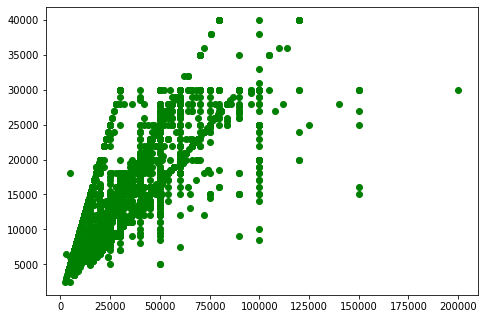

In [1268]:
y = data['rent_amount']
x = data['deposit']
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.scatter(x,y,color="g")
plt.show()
# Removing outliners by using scatter graphs

In [1269]:
data = data[(data['deposit']<200000)]

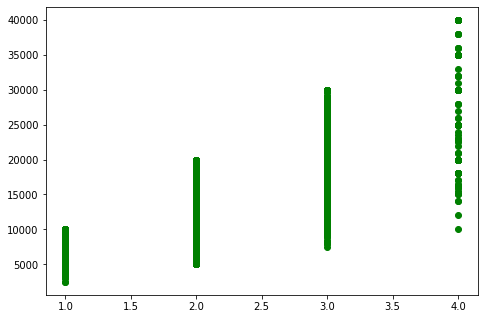

In [1270]:
y = data['rent_amount']
x = data['type_bhk']
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.scatter(x,y,color="g")
plt.show()
# no ouliners

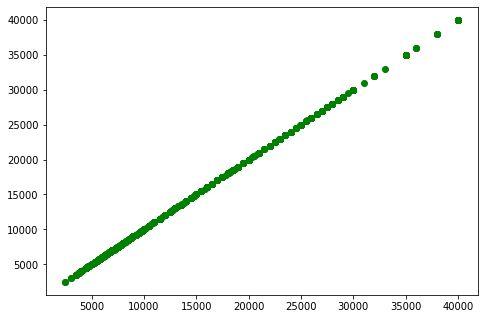

In [1271]:
y = data['rent_amount']
x = data['rent_amount']
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.scatter(x,y,color="g")
plt.show()

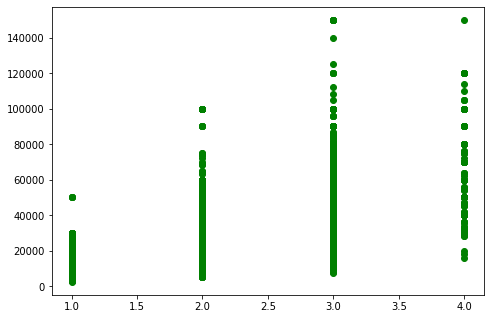

In [1272]:
y = data['deposit']
x = data['type_bhk']
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.scatter(x,y,color="g")
plt.show()

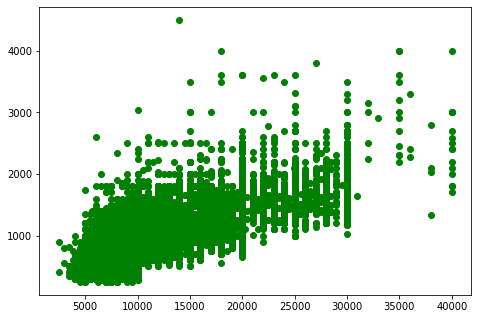

In [1273]:
y = data['property_size']
x = data['rent_amount']
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.scatter(x,y,color="g")
plt.show()

In [1274]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[ 0.        ,  0.        ,  1.61961683, ..., -0.29676165,
         0.23074833, -0.93495127],
       [ 0.        ,  0.        ,  0.11351717, ..., -2.55085125,
        -2.2599497 ,  0.56514718],
       [ 0.        ,  0.        ,  1.61961683, ..., -0.29676165,
        -0.82558775, -0.47295317],
       ...,
       [ 0.        ,  0.        ,  1.61961683, ...,  0.83028315,
         0.37385781,  0.02224183],
       [ 0.        ,  0.        , -1.39258249, ...,  0.83028315,
         0.80885877, -0.05592774],
       [ 0.        ,  0.        , -1.39258249, ...,  0.83028315,
        -1.73580427,  1.03723751]])

In [1275]:
data.std()

active                    0.000000
balconies                 0.000000
bathroom                  0.663988
deposit               16816.007269
facing                    2.390406
floor                     1.804322
furnishingDesc            0.598908
gym                       0.231544
isMaintenance             0.499964
lift                      0.460460
loanAvailable             0.000000
locality                 64.171321
maintenanceAmount         0.000000
parking                   1.421725
property_age              3.467620
property_size           425.480736
reactivationSource        1.003144
rent_amount            6015.075385
sharedAccomodation        0.000000
swimmingPool              0.228510
totalFloor                2.697091
type_bhk                  0.690667
waterSupply               0.887305
location-x                0.058157
location-y                0.085085
dtype: float64

In [1276]:
data['active'].value_counts()
del data['active']

In [1277]:
y = data['rent_amount']
x = data.drop(columns='rent_amount',axis=1)

In [1278]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [1279]:
model = LinearRegression()

In [1280]:
model.fit(x_train,y_train)

LinearRegression()

In [1281]:
print(model.coef_)
# coef are all the inputs we have given 

[ 0.00000000e+00  4.24355829e+02  1.92364131e-01 -1.82222840e+01
  5.09341946e+01 -7.87136588e+02  4.27606983e+02 -3.35099997e+02
  5.83438993e+02  1.13686838e-12 -2.41657805e+00 -2.27373675e-13
 -3.00179013e+00 -1.53478979e+01  1.64579735e+00  2.41478219e+01
 -1.81898940e-12  2.78274057e+02  1.34126392e+02  1.70465732e+03
  1.13041261e+02 -4.37742543e+03 -8.37036699e+03]


In [1282]:
y_pred = model.predict(x_test)


In [1283]:
print(y_pred)

[ 9871.95270644 10275.05798894 16796.89541163 ... 15494.39167797
 15242.96375018 15412.23852407]


In [1284]:
print(y_test)

13078    10000
2221      9500
5830     20000
12763     6000
1305     22000
         ...  
11959     7500
12019    10000
11296    17000
5339     15000
6508     16000
Name: rent_amount, Length: 3055, dtype: int64


In [1285]:
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
# 4996735

5135679.877161889


In [1286]:
x_test.iloc[0]

balconies                 0.000000
bathroom                  2.000000
deposit               20000.000000
facing                    5.000000
floor                     1.000000
furnishingDesc            2.000000
gym                       0.000000
isMaintenance             1.000000
lift                      0.000000
loanAvailable             0.000000
locality                114.000000
maintenanceAmount         0.000000
parking                   3.000000
property_age              5.000000
property_size          1000.000000
reactivationSource        5.000000
sharedAccomodation        0.000000
swimmingPool              0.000000
totalFloor                2.000000
type_bhk                  2.000000
waterSupply               3.000000
location-x               17.446338
location-y               78.535506
Name: 13078, dtype: float64

In [1287]:
balconies = 0.000000
bathroom = 2.000000
deposit = 20000.000000
facing = 5.000000
floor = 1.000000
furnishingDesc = 2.000000
gym = 0.000000
isMaintenance = 1.000000
lift = 0.000000
loanAvailable = 0.000000
locality = 114.000000
maintenanceAmount = 0.000000
parking = 3.000000
property_age = 5.000000
property_size = 1000.000000
reactivationSource = 5.000000
sharedAccomodation = 0.000000
swimmingPool = 0.000000
totalFloor = 2.000000
type_bhk = 2.000000
waterSupply = 3.000000
location_x = 17.446338
location_y = 78.535506
input_data = np.array([balconies,bathroom,deposit,facing,floor, furnishingDesc, gym,isMaintenance,lift,loanAvailable,locality,maintenanceAmount, parking,property_age,
property_size,reactivationSource,sharedAccomodation,swimmingPool,totalFloor,type_bhk,waterSupply,location_x,location_y])
input_data = input_data.reshape(1,-1)
sol = model.predict(input_data)
print(sol)

[9871.94934428]


c:\Users\SAI VARSHITH\Desktop\ML\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
